In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

In [2]:
df_test_1 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt',  header=0, parse_dates=True, squeeze=True)
df_test_2 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt',  header=0, parse_dates=True, squeeze=True)
df_training = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt',  header=0, parse_dates=True, squeeze=True)

In [3]:
df_test_1.head(5)
df_test_2.sample(5)
df_training.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2138,2015-02-13 02:25:00,21.00,24.80,0.000000,577.000000,0.003810,0
256,2015-02-11 19:02:59,21.20,30.45,0.000000,621.500000,0.004743,0
6139,2015-02-15 21:06:00,20.39,32.00,0.000000,694.666667,0.004742,0
3958,2015-02-14 08:44:59,19.79,36.70,9.333333,503.000000,0.005245,0
5439,2015-02-15 09:26:00,21.10,29.34,231.250000,627.500000,0.004541,0


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
6928,2015-02-09 13:18:00,21.390000,33.090000,13.000000,1209.333333,0.005219,0
6483,2015-02-09 05:53:00,19.390000,26.790000,0.000000,465.333333,0.003725,0
7940,2015-02-10 06:10:00,20.100000,33.090000,0.000000,447.333333,0.004817,0
3370,2015-02-07 01:59:59,19.890000,18.890000,0.000000,436.500000,0.002705,0
936,2015-02-05 09:26:00,22.066667,25.793333,503.666667,969.333333,0.004233,1


**PREPARAZIONE DATASET**

In [4]:
from pandas import concat
df = concat([df_test_1, df_training, df_test_2], ignore_index = True)
df.head(10)

#df.to_csv("dataframe.csv")

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


In [5]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
date             20560 non-null object
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [8]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [9]:
#Normalizzazione

#scaler = MinMaxScaler()
#columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
#scaler.fit(np.array(datatraining[columns]))
#datatest[columns] = scaler.transform(np.array(datatest[columns]))
#datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
#datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

**Creazione nuovi attributi**

In [10]:
import datetime

df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['Hours'] = pd.to_datetime(df['date']).dt.hour
df['Minutes'] = pd.to_datetime(df['date']).dt.minute
df['Seconds'] = pd.to_datetime(df['date']).dt.second

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Office_Hours'] = np.where((df['Hours']>= 7) & (df['Hours']<=18),'1', '0')

In [13]:
df['Office_Hours'] = df['Office_Hours'].astype(int)

In [14]:
from datetime import datetime

In [15]:
def create_new_features(data):
    weekday = []
 
    for index, row in data.iterrows():
        parsed_date = datetime.strptime(row['date'], "%Y-%m-%d %H:%M:%S")
        wday = 0 if parsed_date.isoweekday() > 5 else 1
        weekday.append(wday)
    return weekday

In [16]:
df['Working_day'] = create_new_features(df)

In [17]:
df['Time_blocks']= df['Hours']//6

In [18]:
a = df['Time_blocks']
a_2=pd.get_dummies(a)
a_2.head()

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [19]:
df['Time_blocks_0'] = a_2[0].astype(int)
df['Time_blocks_1'] = a_2[1].astype(int)
df['Time_blocks_2'] = a_2[2].astype(int)
df['Time_blocks_3'] = a_2[3].astype(int)

In [20]:
df = df.drop(['date'], axis=1)
df= df.drop(['Time_blocks'], axis=1)

In [21]:
df.sample(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Dates,Time,Hours,Minutes,Seconds,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3
6405,19.600000,19.50,14.0,451.000000,0.002743,0,2015-02-07,08:10:59,8,10,59,1,0,0,1,0,0
19407,21.790000,34.00,444.0,1222.000000,0.005498,1,2015-02-17,14:06:59,14,6,59,1,1,0,0,1,0
2610,22.908333,25.39,689.0,956.333333,0.004387,1,2015-02-04,09:49:00,9,49,0,1,1,0,1,0,0
9853,22.200000,38.40,433.0,1923.750000,0.006375,1,2015-02-09,17:38:59,17,38,59,1,1,0,0,1,0
7949,19.390000,30.60,24.0,431.000000,0.004259,0,2015-02-08,09:55:00,9,55,0,1,0,0,1,0,0


In [22]:
df.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
Dates             object
Time              object
Hours              int64
Minutes            int64
Seconds            int64
Office_Hours       int32
Working_day        int64
Time_blocks_0      int32
Time_blocks_1      int32
Time_blocks_2      int32
Time_blocks_3      int32
dtype: object

In [23]:
df.to_csv("dataframe.csv") # dataset completo con Dates e Time

In [24]:
df = df.drop(['Dates'], axis=1)
df = df.drop(['Time'], axis=1)
df = df.drop(['Minutes'], axis=1)
df = df.drop(['Seconds'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,1,1,0,0,1,0
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,1,1,0,0,1,0
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,1,1,0,0,1,0
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,1,1,0,0,1,0
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,1,1,0,0,1,0


In [25]:
df_corr = df.copy()

In [26]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3
Temperature,1.000000,-0.156964,0.688571,0.449989,0.205280,0.555610,0.235753,0.514673,0.412400,-0.355316,-0.027043,0.530574,-0.126163
Humidity,-0.156964,1.000000,-0.029459,0.299746,0.932724,0.046240,0.115163,0.044790,-0.215841,-0.075238,-0.074109,0.081314,0.069737
Light,0.688571,-0.029459,1.000000,0.448105,0.223329,0.914850,0.094259,0.653660,0.267150,-0.370862,0.240701,0.510488,-0.352722
CO2,0.449989,0.299746,0.448105,1.000000,0.477965,0.501582,0.127407,0.313928,0.372715,-0.208462,0.031303,0.276663,-0.086918
HumidityRatio,0.205280,0.932724,0.223329,0.477965,1.000000,0.257324,0.202030,0.231243,-0.051735,-0.203230,-0.088283,0.277163,0.024095
Occupancy,0.555610,0.046240,0.914850,0.501582,0.257324,1.000000,0.103108,0.576591,0.341949,-0.327136,0.191196,0.465546,-0.305109
Hours,0.235753,0.115163,0.094259,0.127407,0.202030,0.103108,1.000000,0.141598,-0.004193,-0.755129,-0.248077,0.244577,0.763152
Office_Hours,0.514673,0.044790,0.653660,0.313928,0.231243,0.576591,0.141598,1.000000,-0.031597,-0.567362,0.393637,0.575960,-0.368165
Working_day,0.412400,-0.215841,0.267150,0.372715,-0.051735,0.341949,-0.004193,-0.031597,1.000000,0.017927,-0.008618,-0.028669,0.017927
Time_blocks_0,-0.355316,-0.075238,-0.370862,-0.208462,-0.203230,-0.327136,-0.755129,-0.567362,0.017927,1.000000,-0.339124,-0.326778,-0.356201


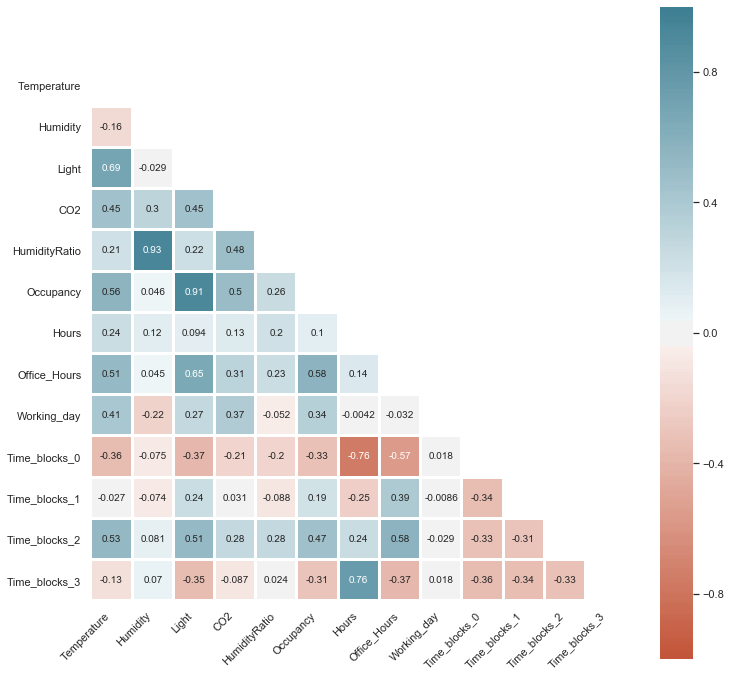

In [27]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (12,12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

**Creazione attributi per Dimensionality Reduction**

In [28]:
df_1 = df.copy()

In [29]:
df_1['Light/Temperature'] = df_1['Light']/df_1['Temperature']

In [30]:
df_1['Light/Humidity'] = df_1['Light']/df_1['Humidity']

In [31]:
df_1['Light/CO2'] = df_1['Light']/df_1['CO2']

In [32]:
df_1['Light/HumidityRatio'] = df_1['Light']/df_1['HumidityRatio']

In [33]:
df_1['Temperature/CO2'] = df_1['Temperature']/df['CO2']

In [34]:
df_1['Temperature/Humidity'] = df_1['Temperature']/df_1['Humidity']

In [35]:
df_1['Temperature/HumidityRatio'] = df_1['Temperature']/df_1['HumidityRatio']

In [36]:
df_1['Humidity/CO2'] = df_1['Humidity']/df_1['CO2']

In [37]:
df_1['Humidity/Temperature'] = df_1['Humidity']/df_1['Temperature']

In [38]:
df_1['Humidity/HumidityRatio'] = df_1['Humidity']/df_1['HumidityRatio']

In [39]:
df_1['HumidityRatio/Humidity'] = df_1['HumidityRatio']/df_1['Humidity']

In [40]:
df_1['HumidityRatio/Temperature'] = df_1['HumidityRatio']/df_1['Temperature']

In [41]:
df_1['HumidityRatio/CO2'] = df_1['HumidityRatio']/df_1['CO2']

In [42]:
df_1['CO2/Temperature'] = df_1['CO2']/df_1['Temperature']

In [43]:
df_1['CO2/Humidity'] = df_1['CO2']/df_1['Humidity']

In [44]:
df_1['CO2/HumidityRatio'] = df_1['CO2']/df_1['HumidityRatio']

In [45]:
df_1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,1,1,0,...,4974.640851,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,1,1,0,...,4969.554728,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,1,1,0,...,4979.903526,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,1,1,0,...,5000.765892,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,1,1,0,...,4983.432615,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863


In [46]:
df_corr = df_1.copy()

In [47]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
Temperature,1.000000,-0.156964,0.688571,0.449989,0.205280,0.555610,0.235753,0.514673,0.412400,-0.355316,...,0.043871,-0.620377,-0.391500,-0.998712,0.999114,-0.073264,-0.489267,0.362723,0.539338,0.408619
Humidity,-0.156964,1.000000,-0.029459,0.299746,0.932724,0.046240,0.115163,0.044790,-0.215841,-0.075238,...,-0.971097,0.304892,0.968915,0.139784,-0.138041,0.996359,0.292575,0.325430,-0.104278,-0.105990
Light,0.688571,-0.029459,1.000000,0.448105,0.223329,0.914850,0.094259,0.653660,0.267150,-0.370862,...,-0.042164,-0.515090,-0.197353,-0.685950,0.691619,0.030356,-0.449760,0.386714,0.497715,0.405208
CO2,0.449989,0.299746,0.448105,1.000000,0.477965,0.501582,0.127407,0.313928,0.372715,-0.208462,...,-0.340490,-0.771881,0.149410,-0.467069,0.448365,0.344554,-0.782388,0.994809,0.905836,0.893382
HumidityRatio,0.205280,0.932724,0.223329,0.477965,1.000000,0.257324,0.202030,0.231243,-0.051735,-0.203230,...,-0.945787,0.061306,0.814969,-0.222231,0.223452,0.960024,0.094839,0.471913,0.105756,0.058094
Occupancy,0.555610,0.046240,0.914850,0.501582,0.257324,1.000000,0.103108,0.576591,0.341949,-0.327136,...,-0.108293,-0.516377,-0.102319,-0.560640,0.554843,0.096531,-0.477738,0.455098,0.514313,0.445864
Hours,0.235753,0.115163,0.094259,0.127407,0.202030,0.103108,1.000000,0.141598,-0.004193,-0.755129,...,-0.130254,-0.099245,0.044447,-0.243101,0.234448,0.136646,-0.062086,0.105937,0.067367,0.028926
Office_Hours,0.514673,0.044790,0.653660,0.313928,0.231243,0.576591,0.141598,1.000000,-0.031597,-0.567362,...,-0.078919,-0.317858,-0.083459,-0.512588,0.518972,0.089941,-0.262959,0.267031,0.329958,0.256651
Working_day,0.412400,-0.215841,0.267150,0.372715,-0.051735,0.341949,-0.004193,-0.031597,1.000000,0.017927,...,0.107818,-0.543225,-0.319629,-0.425366,0.397154,-0.181510,-0.509565,0.349400,0.460907,0.438667
Time_blocks_0,-0.355316,-0.075238,-0.370862,-0.208462,-0.203230,-0.327136,-0.755129,-0.567362,0.017927,1.000000,...,0.098056,0.208035,0.018349,0.358375,-0.356252,-0.106368,0.164501,-0.177531,-0.190159,-0.138842


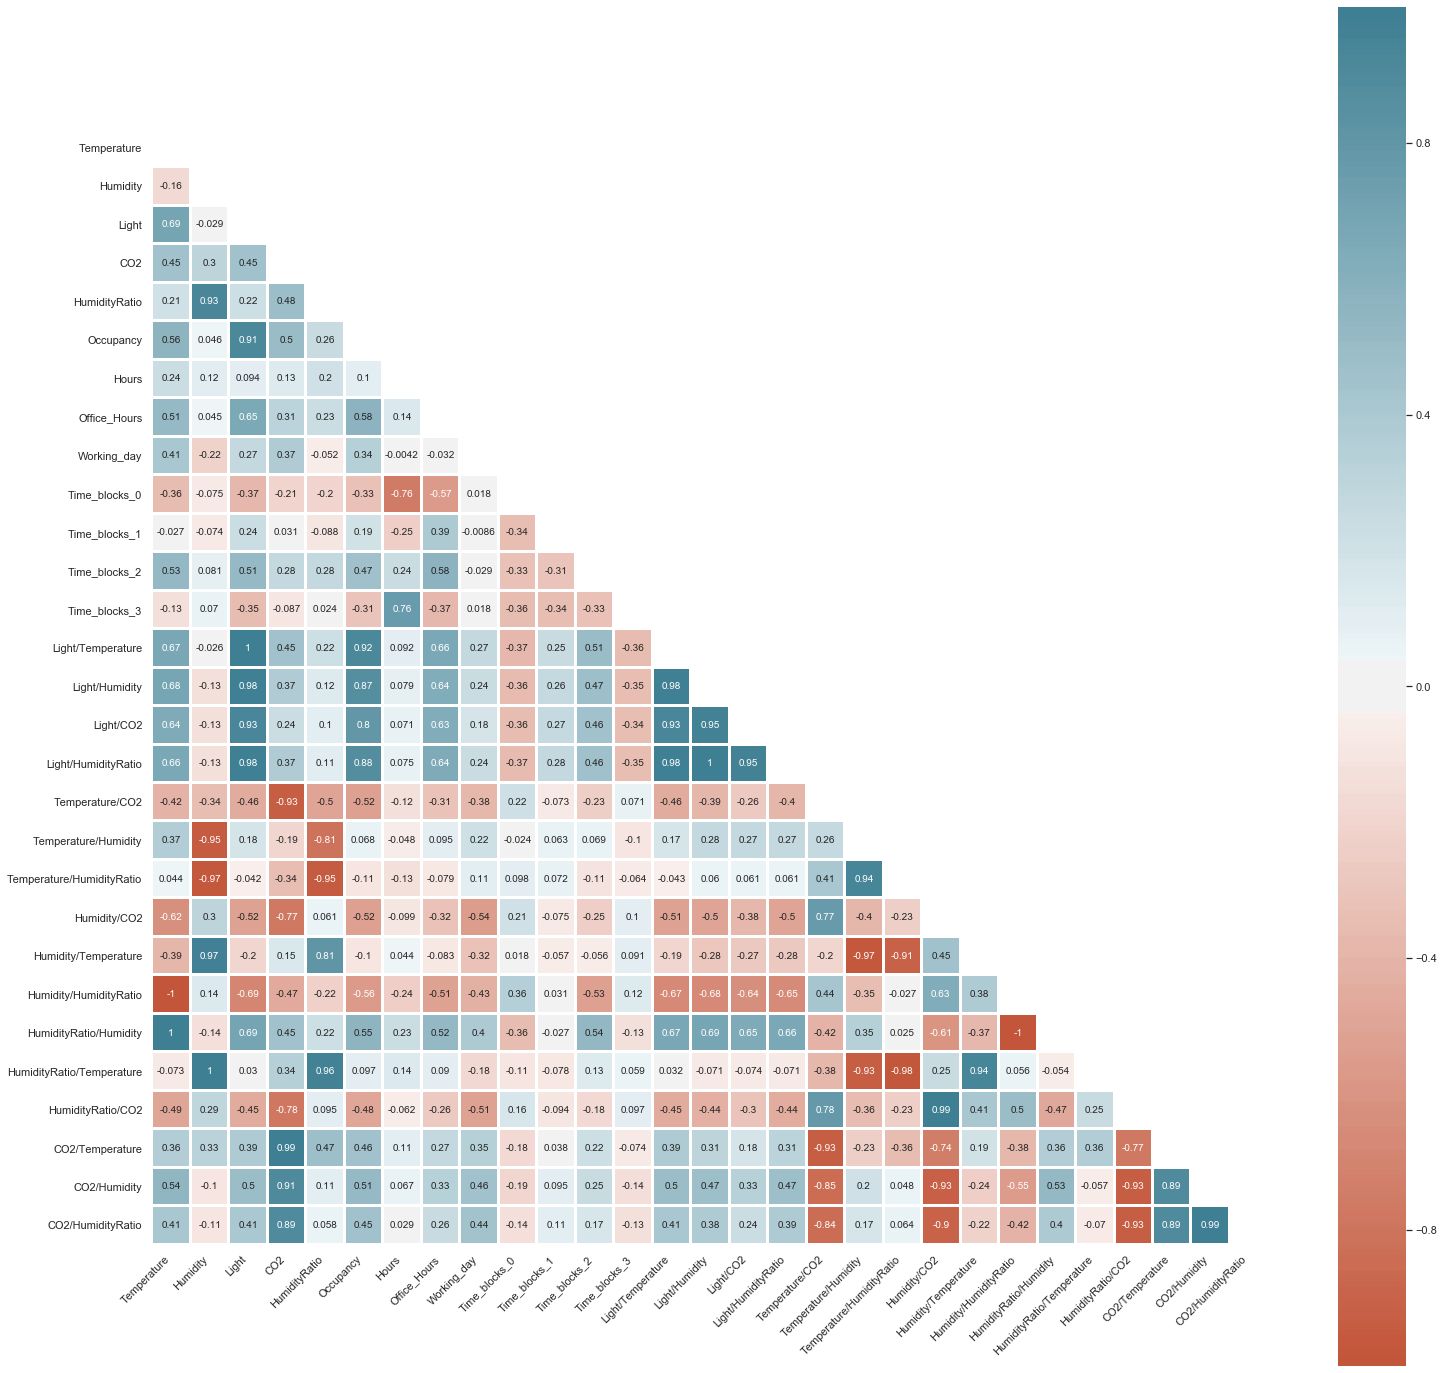

In [55]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (25,25))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [49]:
df_1.to_csv("dataframe_dimensionality_reduction.csv") # togliere Unnamed: 0

**Dataset Preparation per classificazione**

In [50]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [51]:
class_name = 'Occupancy'
#columns2remove = ['Hours','Humidity']
#df.drop(columns2remove, inplace=True, axis=1)
#df.head()

In [52]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,1,0,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,1,0,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,1,0,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,1,0,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,1,0,1


In [53]:
df.to_csv("dataframe_classification.csv") #togliere Unnamed: 0